In [1]:
import statsmodels.api as sms
import statsmodels.api as sms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("perrin-freres-monthly-champagne.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df=df.rename(columns={"Perrin Freres monthly champagne sales millions ?64-?72":"Sales"})

In [5]:
df.drop(105,inplace=True,axis=0)

In [6]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
df.drop(106,inplace=True,axis=0)

In [9]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [14]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [15]:
df["Month"]=pd.to_datetime(df["Month"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [17]:
df.set_index("Month",inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


# Visualize the Time Series Data

<AxesSubplot:xlabel='Month'>

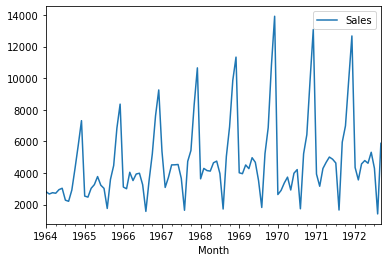

In [20]:
df.plot()

# Make the time series data stationary

In [21]:
# import library for dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [23]:
# Testing For Stationarity

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adf_test(df["Sales"])

ADF Statistics: -1.8335930563276237
p- value: 0.3639157716602447
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [89]:
df["Sales first difference"]=df["Sales"]-df["Sales"].shift(1)

In [90]:
df["Sales season difference"]=df["Sales"]-df["Sales"].shift(12)

In [91]:
adf_test(df["Sales first difference"].dropna())

ADF Statistics: -7.1898964480510115
p- value: 2.5196204473869244e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [92]:
## Again test dickey fuller test for season 
adf_test(df["Sales season difference"].dropna())

ADF Statistics: -7.626619157213163
p- value: 2.060579696813685e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


# Plot the Correlation and AutoCorrelation Charts

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


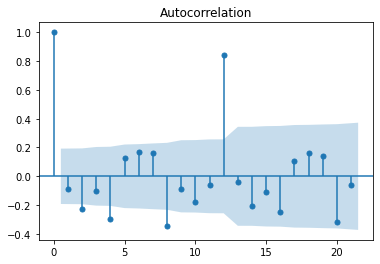

In [51]:
acf=plot_acf(df["Sales first difference"].dropna())

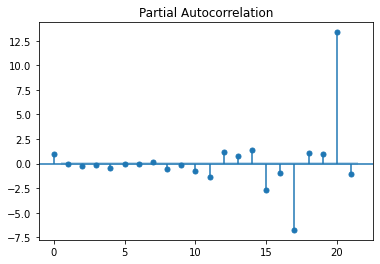

In [52]:
pacf=plot_pacf(df["Sales first difference"].dropna())

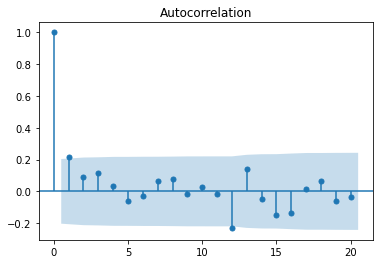

In [53]:
acf12=plot_acf(df["Sales season difference"].dropna())

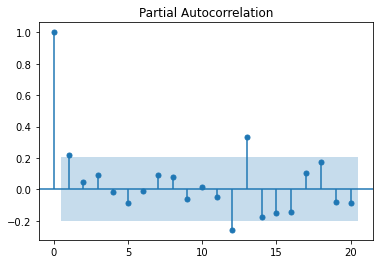

In [54]:
pacf12=plot_pacf(df["Sales season difference"].dropna())

In [87]:
df.tail()

,Sales,Sales first difference,Sales season difference
Month,,,
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0
1972-08-01,1413.0,-2885.0,-246.0
1972-09-01,5877.0,4464.0,-74.0


In [122]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1968,12,1)
test_dataset_end=datetime(1972,12,1)

In [123]:
#train test split
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [124]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [125]:
model_ARIMA=ARIMA(train_data['Sales'],order=(1,1,1))

In [126]:
model_Arima_fit=model_ARIMA.fit()

In [127]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -525.032
Method:                       css-mle   S.D. of innovations           1729.209
Date:                Fri, 14 Oct 2022   AIC                           1058.064
Time:                        17:30:11   BIC                           1066.374
Sample:                    02-01-1964   HQIC                          1061.308
                         - 12-01-1968                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            65.2985     27.534      2.372      0.018      11.332     119.265
ar.L1.D.Sales     0.5529      0.123      4.514      0.000       0.313       0.793
ma.L1.D.Sales    -1.0000      0.045    -22.162      0.000      -1.088      -0.912
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8085           +0.0000j            1.8085            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [128]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1969-01-01 00:00:00
1972-09-01 00:00:00


In [129]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Sales']-pred

In [130]:
pred

1969-01-01   -2167.283690
1969-02-01   -1169.175857
1969-03-01    -617.286425
1969-04-01    -312.127069
1969-05-01    -143.393573
1969-06-01     -50.094804
1969-07-01       1.493415
1969-08-01      30.018381
1969-09-01      45.790853
1969-10-01      54.512015
1969-11-01      59.334257
1969-12-01      62.000647
1970-01-01      63.474988
1970-02-01      64.290205
1970-03-01      64.740967
1970-04-01      64.990209
1970-05-01      65.128024
1970-06-01      65.204227
1970-07-01      65.246362
1970-08-01      65.269661
1970-09-01      65.282543
1970-10-01      65.289666
1970-11-01      65.293605
1970-12-01      65.295782
1971-01-01      65.296987
1971-02-01      65.297653
1971-03-01      65.298021
1971-04-01      65.298224
1971-05-01      65.298337
1971-06-01      65.298399
1971-07-01      65.298433
1971-08-01      65.298452
1971-09-01      65.298463
1971-10-01      65.298469
1971-11-01      65.298472
1971-12-01      65.298474
1972-01-01      65.298475
1972-02-01      65.298475
1972-03-01  

<AxesSubplot:ylabel='Density'>

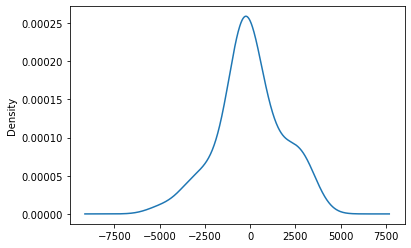

In [131]:
model_Arima_fit.resid.plot(kind='kde')

In [132]:
test_data['Predicted_ARIMA']=pred

# Construct the ARIMA Model based on the data

<AxesSubplot:xlabel='Month'>

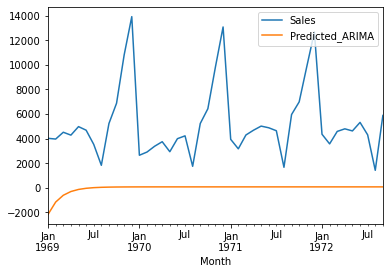

In [133]:
test_data[['Sales','Predicted_ARIMA']].plot()

In [134]:
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [135]:
model_SARIMA=SARIMAX(train_data['Sales'],order=(3,0,2),seasonal_order=(0,1,0,12))

In [136]:
model_SARIMA_fit=model_SARIMA.fit()

In [137]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   60
Model:             SARIMAX(3, 0, 2)x(0, 1, [], 12)   Log Likelihood                -377.160
Date:                             Fri, 14 Oct 2022   AIC                            766.320
Time:                                     17:30:13   BIC                            777.548
Sample:                                 01-01-1964   HQIC                           770.563
                                      - 12-01-1968                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0197      0.203     -0.097      0.923      -0.418       0.379
ar.L2          0.8306      0.186      4.459      0.000       0.465       1.196
ar.L3          0.1888      0.210      0.900      0.368      -0.222       0.600
ma.L1         -0.0194      0.304     -0.064      0.949      -0.615       0.576
ma.L2         -0.9741      0.208     -4.686      0.000      -1.381      -0.567
sigma2      4.769e+05   3.85e-07   1.24e+12      0.000    4.77e+05    4.77e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.80
Prob(Q):                              0.92   Prob(JB):                         0.03
Heteroskedasticity (H):               2.80   Skew:                             0.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.91e+28. Standard errors may be unstable.
"""

In [138]:
pred=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Sales']-pred

<AxesSubplot:xlabel='Month'>

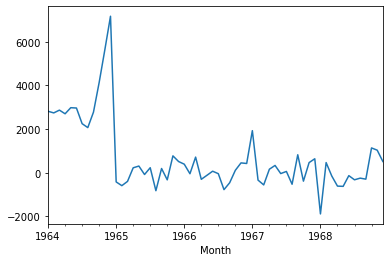

In [139]:
model_SARIMA_fit.resid.plot()

In [140]:
test_data['Predicted_SARIMA']=pred

# Construct Seasonal ARIMA based on the data

<AxesSubplot:xlabel='Month'>

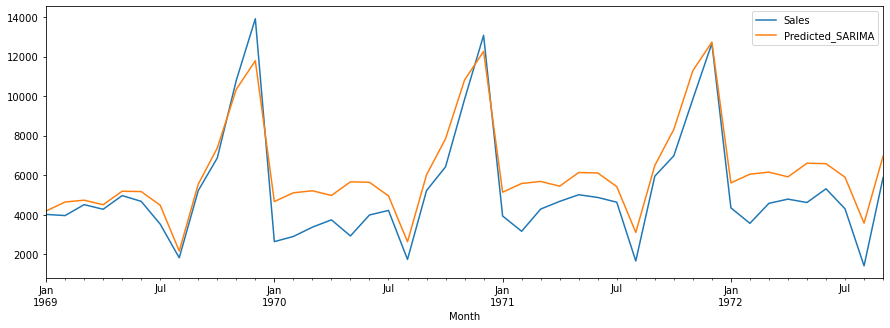

In [141]:
test_data[['Sales','Predicted_SARIMA']].plot(figsize=(15,5))

In [142]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [143]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [144]:
future_datest_df.tail()

,Sales,Sales first difference,Sales season difference
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [145]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

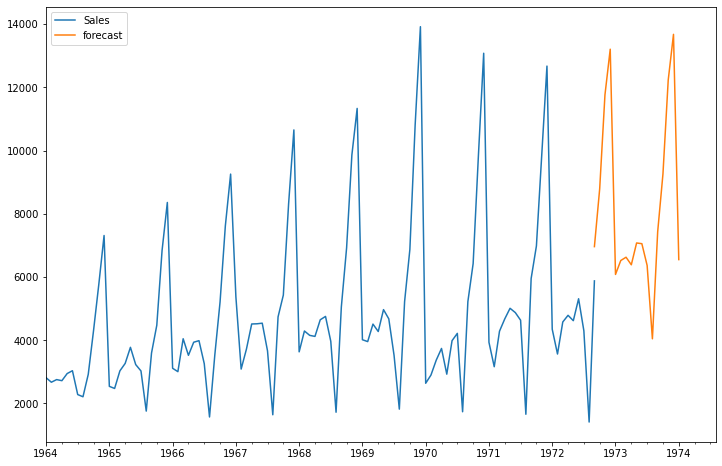

In [147]:
future_df['forecast'] = model_SARIMA_fit.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 